In [1]:
pip install matplotlib.pyplot 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import pandas as pd

# Load the dataset using a different encoding
data = pd.read_csv("data.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# Check for missing values
data.isnull().sum()

# Remove duplicates
data = data.drop_duplicates()

# Correct data types (if necessary)
data.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
# Summary statistics for numerical columns
data.describe()




,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Count unique values for categorical columns
data['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: count, Length: 25900, dtype: int64

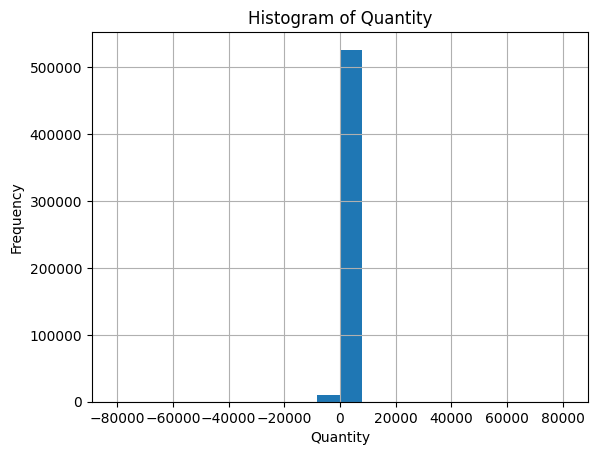

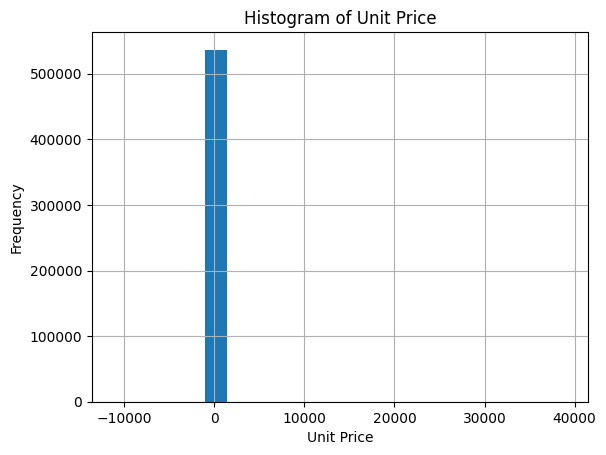

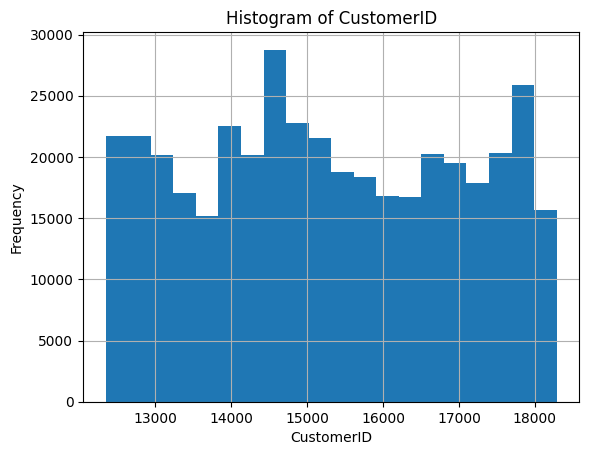

In [6]:
import matplotlib.pyplot as plt

data['Quantity'].hist(bins=20)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

data['UnitPrice'].hist(bins=20)
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

data['CustomerID'].hist(bins=20)
plt.title('Histogram of CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

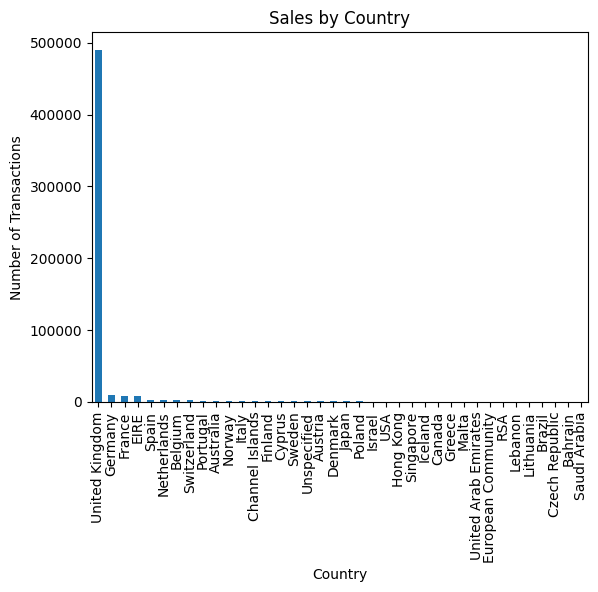

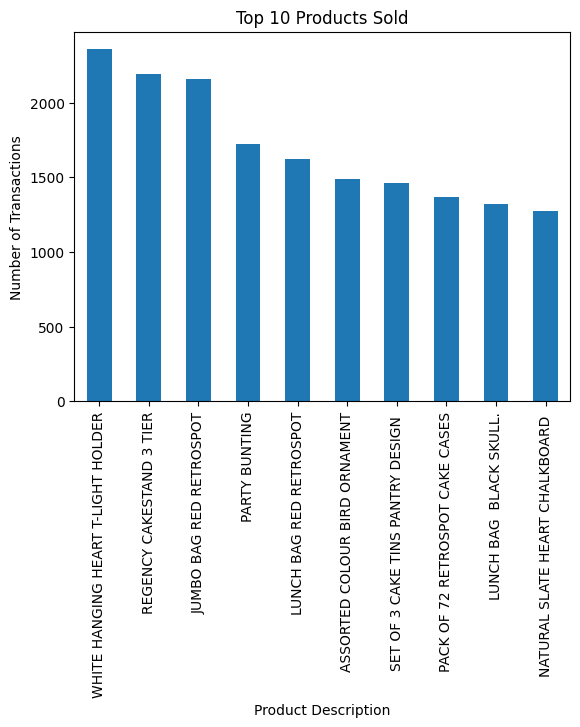

In [7]:
data['Country'].value_counts().plot(kind='bar')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

data['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Products Sold')
plt.xlabel('Product Description')
plt.ylabel('Number of Transactions')
plt.show()


In [8]:
# Check for unique values in 'Quantity' and 'UnitPrice'
print(data['Quantity'].unique())
print(data['UnitPrice'].unique())


[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     41    -72    -35    -21    -43    -19    -18
    -44    402    378    150    300     54    104     67    258     66
     4

In [9]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')


In [10]:
data = data.dropna(subset=['Quantity', 'UnitPrice'])  # Drop rows with NaN in these columns
# OR
data['Quantity'].fillna(data['Quantity'].mean(), inplace=True)  # Fill with mean
data['UnitPrice'].fillna(data['UnitPrice'].mean(), inplace=True)  # Fill with mean


In [11]:
# Check the data types again
print(data.dtypes)


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [12]:
# Inspect unique values in potentially problematic columns
print(data['Quantity'].unique())
print(data['UnitPrice'].unique())
print(data['CustomerID'].unique())  # CustomerID may also contain non-numeric values


[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     41    -72    -35    -21    -43    -19    -18
    -44    402    378    150    300     54    104     67    258     66
     4

In [13]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Inspect unique values again to ensure conversion
print(data['Quantity'].unique())
print(data['UnitPrice'].unique())


[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70   -130    -80   -120    -40    -25    -14    -15    -69
   -140   -320     -8    720    156    324     38     37     49     95
     -9    -11     29     41    -72    -35    -21    -43    -19    -18
    -44    402    378    150    300     54    104     67    258     66
     4

In [14]:
# Check for NaN values
print(f"NaN values in Quantity: {data['Quantity'].isnull().sum()}")
print(f"NaN values in UnitPrice: {data['UnitPrice'].isnull().sum()}")

# Drop rows with NaN values in Quantity or UnitPrice
data = data.dropna(subset=['Quantity', 'UnitPrice'])


NaN values in Quantity: 0
NaN values in UnitPrice: 0


            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001241   -0.003457
UnitPrice  -0.001241   1.000000   -0.004524
CustomerID -0.003457  -0.004524    1.000000


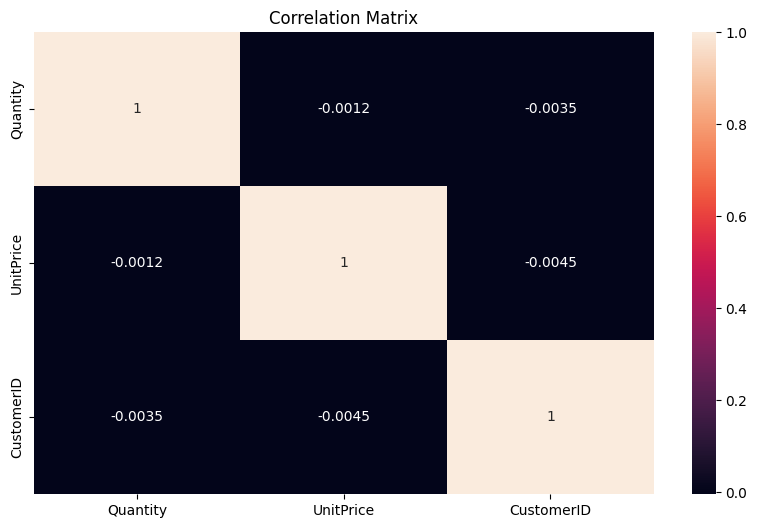

In [15]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


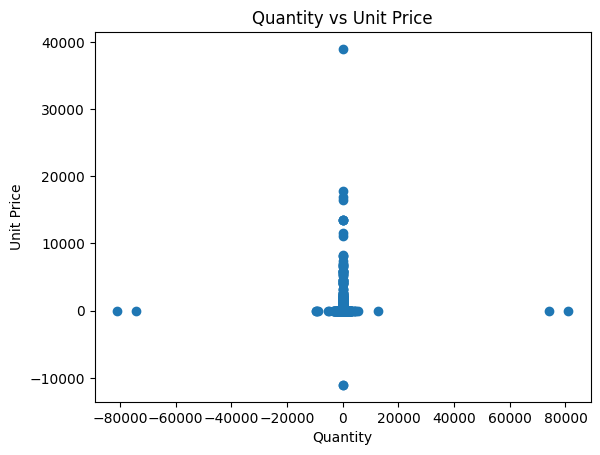

In [16]:
plt.scatter(data['Quantity'], data['UnitPrice'])
plt.title('Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()


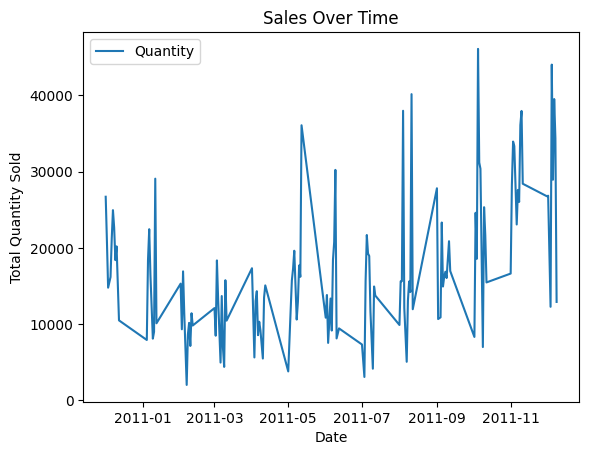

In [17]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Now you can use the .dt accessor to extract the date
sales_over_time = data.groupby(data['InvoiceDate'].dt.date).agg({'Quantity': 'sum'})

# Plot the sales over time
sales_over_time.plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

